# Análisis de basicidad de la escoria
Por: Daniel Gutiérrez Ruiz

En este notebook se considera un conjunto de datos que contiene información del proceso de fundición de chatarra en un horno de arco eléctrico. El objetivo es realizar un análisis de la basicidad de la escoria resultante. La escoria se forma en el proceso de fundición debido a las impurezas que contenga el material, además de residuos en el horno, y algunos compuestos derivados de elementos añadidos en el proceso. El horno de arco eléctrico se carga con chatarra y además se adiciona cal dolomítica y siderúrgica, además de oxígeno y carbono, esto con el objetivo de lograr una escoria espumosa. La ventaja de tener una escoria espumosa de calidad es que protege al material refractario del horno. Los compuestos que contiene la escoria espumosa se pueden clasificar en óxidos básicos (refractarios) y óxidos ácidos (fundentes). Para medir la basicidad en la escoria se usará el índice de basicidad terciaria (IB3), dado por CaO/(SiO2+Al2O3). Se intenta alcanzar un equilibrio entre los óxidos básicos y ácidos para que la escoria sea compatible con el refractario básico del horno.

Primero se explora el conjunto de datos para ver qué información está disponible y puede ser de utilidad para un análisis más a fondo. Posteriormente, se realiza un estudio descriptivo de ciertos indicadores, complementándose con un análisis de su distribución y detección de datos atípicos, así como la correlación entre variables de interés.

## 1. Exploración de datos

Se importan los módulos de Python a utilizar. pandas es para manipulación de DataFrames, numpy para cálculo vectorizado y seaborn y matplotlib para visualización de datos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Leemos el archivo csv que contiene la información.

In [2]:
df = pd.read_csv("slag_dataset.csv", sep=",")

Vemos la dimensión del DataFrame con el atributo shape.

In [3]:
df.shape

(5384, 106)

Notamos que cuenta con 5384 filas (registros) y 106 columnas (atributos). Hacemos una pequeña visualización para tener una idea de su contenido usando head.

In [4]:
df.head(10)

,heat_num,grado,num_cga_met,TCM,Time_Vac_Vac,Power_ON,Tpo_Aux,Total_min_Demoras,tco_kwh,Potencia,...,MgO,sio2,al2o3,mno,s,fe2o3,ib2,ib4,feo,IB3
0,462896,251046-6DEA,2,170.541000,44.766666,34.683334,4.266666,4.816666,45935,95.54000092,...,6.88412,24.72454,3.70284,0.22302,4.150650,0.83426,2.956608,2.857252,0.751542,2.179196
1,462897,251028 DEA,2,182.727005,68.349998,43.283333,6.506666,17.560000,56505,92.5,...,7.12602,26.15234,2.65618,0.10148,4.856408,0.56522,2.830938,2.861736,0.509170,2.177890
2,462898,251028 DEA,2,181.233002,123.033333,42.666664,8.476665,70.890000,55445,92.33000183,...,7.87296,25.90572,2.84852,0.10856,4.711386,0.61596,2.745270,2.796364,0.554954,2.096028
3,462899,251028 DEA,2,183.348007,46.483330,39.183331,4.649999,1.650000,51715,94.19999695,...,7.29004,25.65320,2.14996,0.11210,4.080204,0.46728,2.732054,2.830112,0.421024,2.136236
4,462906,251028 DEA,2,183.287003,49.349998,40.316666,7.200000,0.833333,54245,95.66999817,...,9.07420,16.37840,10.26600,7.36320,0.106200,30.78620,2.615942,2.009894,27.735310,1.362710
5,462907,251028-G40DEA,2,183.514008,46.099998,37.566666,6.816666,0.716666,50465,96.18998718,...,10.01820,15.32820,8.04760,7.16260,0.106200,38.29100,2.664322,2.252738,34.496356,1.480565
6,462908,25102-2A,2,183.705994,47.616661,38.499996,6.783333,1.333333,51735,95.97000122,...,9.33380,14.30160,7.89420,6.78500,0.094400,47.30620,2.543018,2.134738,42.618178,1.388623
7,462931,2510088 VDEDEA,2,183.770004,65.183331,53.849998,8.616666,1.716666,65055,85.12000275,...,9.36920,16.39020,9.34560,8.59040,0.106200,35.38820,2.403306,1.960216,31.881240,1.297111
8,462932,2510088 VDEDEA,2,181.367996,136.966660,41.599998,6.933333,87.433332,53645,92.09999847,...,10.60820,16.33120,9.13320,7.71720,0.106200,33.25240,2.573108,2.141818,29.957132,1.398517
9,462933,2510088 VDEDEA,2,175.470001,55.529995,39.133331,6.800000,8.596665,50135,91.84999847,...,11.11560,16.67340,10.32500,7.69360,0.106200,28.20200,2.591280,2.086122,25.407170,1.356206


Ahora vemos un resumen del tipo de datos de las columnas con el método info.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Columns: 106 entries, heat_num to IB3
dtypes: float64(90), int64(11), object(5)
memory usage: 4.4+ MB


Vemos que hay 90 columnas de tipo flotante, 11 de tipo entero y 5 de tipo objeto.  
Las variables contenidas en el dataset son:
- **heat_num**: Número de colada (int64)
- **grado**: Grado de acero a fabricar (object)
- **num_cga_met**: Cantidad de cestas de chatarra cargadas al horno (int64)
- **TCM**: Total de toneladas de carga metálica que se funden en el horno (float64)
- **Time_Vac_Vac**: Tiempo que tarda en fundirse la chatarra (float64)
- **Power_ON**: Tiempo que dura el horno conectado durante una colada (float64)
- **Tpo_Aux**: Tiempos de tareas de soporte durante la colada (float64)
- **Total_min_Demoras**: Tiempo de las interrupciones durante el proceso en el horno (float64)
- **tco_kwh**: Tiempo conectado por KWh (object)
- **Potencia**: Potencia consumida por el horno durante la colada (object)
- **O2**: Consumo de oxígeno durante la colada (float64)
- **Grafito**: Consumo de carbón durante la colada (float64)
- **Cal_Total**: Consumo total de cales durante la colada (int64)
- **Cal_Total_Sid**: Cal siderúrgica consumida (int64)
- **Cal_Total_Dol**: Cal dolomítica consumida (int64)
- **muestra_temp**: Temperatura del acero líquido (int64)
- **muestra_ppmo2**: Partes por millón de oxígeno en el acero (object)
- **c1_tco_tpo_con, c1_tco_kwh, c1_tco_mw_prom, c2_tco_tpo_con, c2_tco_kwh, c2_tco_mw_prom, c7_tco_tpo_con, c7_tco_kwh, c7_tco_mw_prom**: Tiempos conectados y consumo de energía para cada carga de chatarra en el horno
- **cga_met_1**: Toneladas de chatarra en la primera carga (float64)
- **cga_met_2**: Toneladas de chatarra en la segunda carga (object)
- **cga_met_3**: Toneladas de chatarra en la tercera carga (float64)
- **CHXX**: Tipo de chatarra que se funde en el horno
- **CaO**: Óxido de calcio en la escoria (float64)
- **MgO**: Óxido de magnesio en la escoria (float64)
- **sio2**: Dióxido de silicio (float64)
- **al2o3**: Óxido de aluminio (float64)
- **mno**: Óxido de manganeso(II) (float64)
- **s**: Azufre (float64)
- **fe2o3**: Óxido de hierro(III) (float64)
- **ib2**: (float64)
- **ib4**: (float64)
- **feo**: Óxido de hierro(II) (float64)
- **IB3**: Índice de basicidad terciaria (float64)

Ahora corroboramos si hay valores nulos en nuestro DataFrame.

In [6]:
df.isnull().sum().head(56)

heat_num                0
grado                   0
num_cga_met             0
TCM                     0
Time_Vac_Vac            0
Power_ON                0
Tpo_Aux                 3
Total_min_Demoras      34
tco_kwh                 0
Potencia                0
O2                      0
Grafito                 0
Cal_Total               0
Cal_Total_Sid           0
Cal_Total_Dol           0
muestra_temp            0
muestra_ppmo2           0
c1_tco_tpo_con        237
c1_tco_kwh            237
c1_tco_mw_prom        237
c2_tco_tpo_con        350
c2_tco_kwh            350
c2_tco_mw_prom        350
c7_tco_tpo_con         44
c7_tco_kwh             44
c7_tco_mw_prom         44
cga_met_1               0
cga_met_2               0
cga_met_3            2876
CH01                    0
CH02                    0
CH03                    0
CH04                    0
CH05                    0
CH06                    0
CH07                    0
CH08                    0
CH09                    0
CH10        

In [7]:
df.isnull().sum().tail(50)

CH06_C1    0
CH07_C1    0
CH08_C1    0
CH09_C1    0
CH10_C1    0
CH11_C1    0
CH15_C1    0
CH31_C1    0
CH33_C1    0
CH34_C1    0
CH50_C1    0
CH60_C1    0
CH63_C1    0
CH64_C1    0
CH67_C1    0
CH70_C1    0
CH71_C1    0
CH01_C2    0
CH02_C2    0
CH03_C2    0
CH04_C2    0
CH05_C2    0
CH06_C2    0
CH07_C2    0
CH08_C2    0
CH09_C2    0
CH10_C2    0
CH11_C2    0
CH15_C2    0
CH31_C2    0
CH33_C2    0
CH34_C2    0
CH50_C2    0
CH60_C2    0
CH63_C2    0
CH64_C2    0
CH67_C2    0
CH70_C2    0
CH71_C2    0
CaO        0
MgO        0
sio2       0
al2o3      0
mno        0
s          0
fe2o3      0
ib2        0
ib4        0
feo        0
IB3        0
dtype: int64

También nos percatamos de que hay celdas que contienen la cadena "#¡VALOR!". Aquí hay una porción del DataFrame donde se pueden apreciar algunos NaN y algunos "#¡VALOR!":

In [8]:
df[df["num_cga_met"]==1][["heat_num", "num_cga_met", "TCM", "cga_met_1", "cga_met_2", "cga_met_3"]]

,heat_num,num_cga_met,TCM,cga_met_1,cga_met_2,cga_met_3
1388,470103,1,106.051002,86.051,20,0.0
2570,475657,1,97.305000,77.305,#¡VALOR!,NaN
3565,481191,1,175.197998,155.198,#¡VALOR!,NaN
3566,481191,1,175.197998,155.198,#¡VALOR!,NaN
3567,481191,1,175.197998,155.198,#¡VALOR!,NaN
3568,481192,1,177.147003,157.147,#¡VALOR!,NaN
3569,481192,1,177.147003,157.147,#¡VALOR!,NaN
3570,481193,1,180.427002,160.427,#¡VALOR!,NaN
3571,481193,1,180.427002,160.427,#¡VALOR!,NaN
3574,481195,1,178.139999,158.140,#¡VALOR!,NaN


Para ver cuántos entradas "#¡VALOR!" hay por cada columna, definimos una función y la aplicamos sobre las columnas:

In [9]:
def igual_a_valor(ser):
    return (ser == "#¡VALOR!").sum()

df.apply(igual_a_valor, axis=0).head(56)

heat_num               0
grado                  0
num_cga_met            0
TCM                    0
Time_Vac_Vac           0
Power_ON               0
Tpo_Aux                0
Total_min_Demoras      0
tco_kwh                1
Potencia               1
O2                     0
Grafito                0
Cal_Total              0
Cal_Total_Sid          0
Cal_Total_Dol          0
muestra_temp           0
muestra_ppmo2        125
c1_tco_tpo_con         0
c1_tco_kwh             0
c1_tco_mw_prom         0
c2_tco_tpo_con         0
c2_tco_kwh             0
c2_tco_mw_prom         0
c7_tco_tpo_con         0
c7_tco_kwh             0
c7_tco_mw_prom         0
cga_met_1              0
cga_met_2             22
cga_met_3              0
CH01                   0
CH02                   0
CH03                   0
CH04                   0
CH05                   0
CH06                   0
CH07                   0
CH08                   0
CH09                   0
CH10                   0
CH11                   0


In [10]:
df.apply(igual_a_valor, axis=0).tail(50)

CH06_C1    0
CH07_C1    0
CH08_C1    0
CH09_C1    0
CH10_C1    0
CH11_C1    0
CH15_C1    0
CH31_C1    0
CH33_C1    0
CH34_C1    0
CH50_C1    0
CH60_C1    0
CH63_C1    0
CH64_C1    0
CH67_C1    0
CH70_C1    0
CH71_C1    0
CH01_C2    0
CH02_C2    0
CH03_C2    0
CH04_C2    0
CH05_C2    0
CH06_C2    0
CH07_C2    0
CH08_C2    0
CH09_C2    0
CH10_C2    0
CH11_C2    0
CH15_C2    0
CH31_C2    0
CH33_C2    0
CH34_C2    0
CH50_C2    0
CH60_C2    0
CH63_C2    0
CH64_C2    0
CH67_C2    0
CH70_C2    0
CH71_C2    0
CaO        0
MgO        0
sio2       0
al2o3      0
mno        0
s          0
fe2o3      0
ib2        0
ib4        0
feo        0
IB3        0
dtype: int64

Vemos que las columnas que tienen esta entrada son "tco_kwh", "Potencia", "muestra_ppmo2" y "cga_met_2". Esta es la razón por la que estas columnas tienen tipo de dato objeto, que en este caso sería cadena. Lo que haremos es forzar su conversión a tipo flotante para que las celdas con "#¡VALOR!" queden como NaN y de esta manera uniformizar la información.

In [11]:
df["tco_kwh"] = pd.to_numeric(df["tco_kwh"], errors='coerce')
df["Potencia"] = pd.to_numeric(df["Potencia"], errors='coerce')
df["muestra_ppmo2"] = pd.to_numeric(df["muestra_ppmo2"], errors='coerce')
df["cga_met_2"] = pd.to_numeric(df["cga_met_2"], errors='coerce')

Entonces, las columnas que tienen valores nulos (NaN) son:

In [12]:
nulos = df.isnull().sum()
nulos[nulos!=0]

Tpo_Aux                 3
Total_min_Demoras      34
tco_kwh                 1
Potencia                1
muestra_ppmo2         125
c1_tco_tpo_con        237
c1_tco_kwh            237
c1_tco_mw_prom        237
c2_tco_tpo_con        350
c2_tco_kwh            350
c2_tco_mw_prom        350
c7_tco_tpo_con         44
c7_tco_kwh             44
c7_tco_mw_prom         44
cga_met_2              22
cga_met_3            2876
dtype: int64

Para nuestro análisis no es relevante el tipo de chatarra que se carga en el horno, por lo que no consideraremos las columnas "CHXX" (columnas 29 a 94 en numeración de Python). De esta manera, nuestro DataFrame quedará más reducido.

In [13]:
df = df.drop(df.columns[29:95], axis=1)
df.shape

(5384, 40)

Podemos ver que hay 58 distintos grados de acero en el conjunto de datos. Asimismo, mostramos su conteo de frecuencias.

In [14]:
len(df["grado"].unique())

58

In [15]:
df["grado"].value_counts()

251036 DEA              2465
25102-2A                 383
251028-DEA               293
251036 PRDEA             269
251015 VARDEA            232
251046-6DEA              196
25A-36DEA                165
251044 PTADEA            160
2510088 VDEDEA           158
251028 DEA               124
251048 VDEA              109
2510088 DEA               69
25A630DEA                 64
251028-G40DEA             58
251025-5VRDEA             56
251018 DEA                51
25A529 50 PDEA            49
251008 BCODEA             46
251039 VARDEA             45
251038-10VDEA             37
251004 MBDEA              28
251008 DEA                27
251004 CELDEA             26
251020-6VDEA              25
251008 -INDDEA            22
251004 FWDEA              22
251522-BDEA               20
251005DEA                 20
25GA-G42DEA               20
251527 DEA                19
25A-36 G5DEA              18
251008 AMADEA             18
25PRUEBASDEA              10
251045DEA                 10
251034-8 NbDEA

## 2. Boxplots e histogramas

A continuación, mostramos los boxplots de las primeras variables para entender su distribución.

In [16]:
sns.set_style("darkgrid")

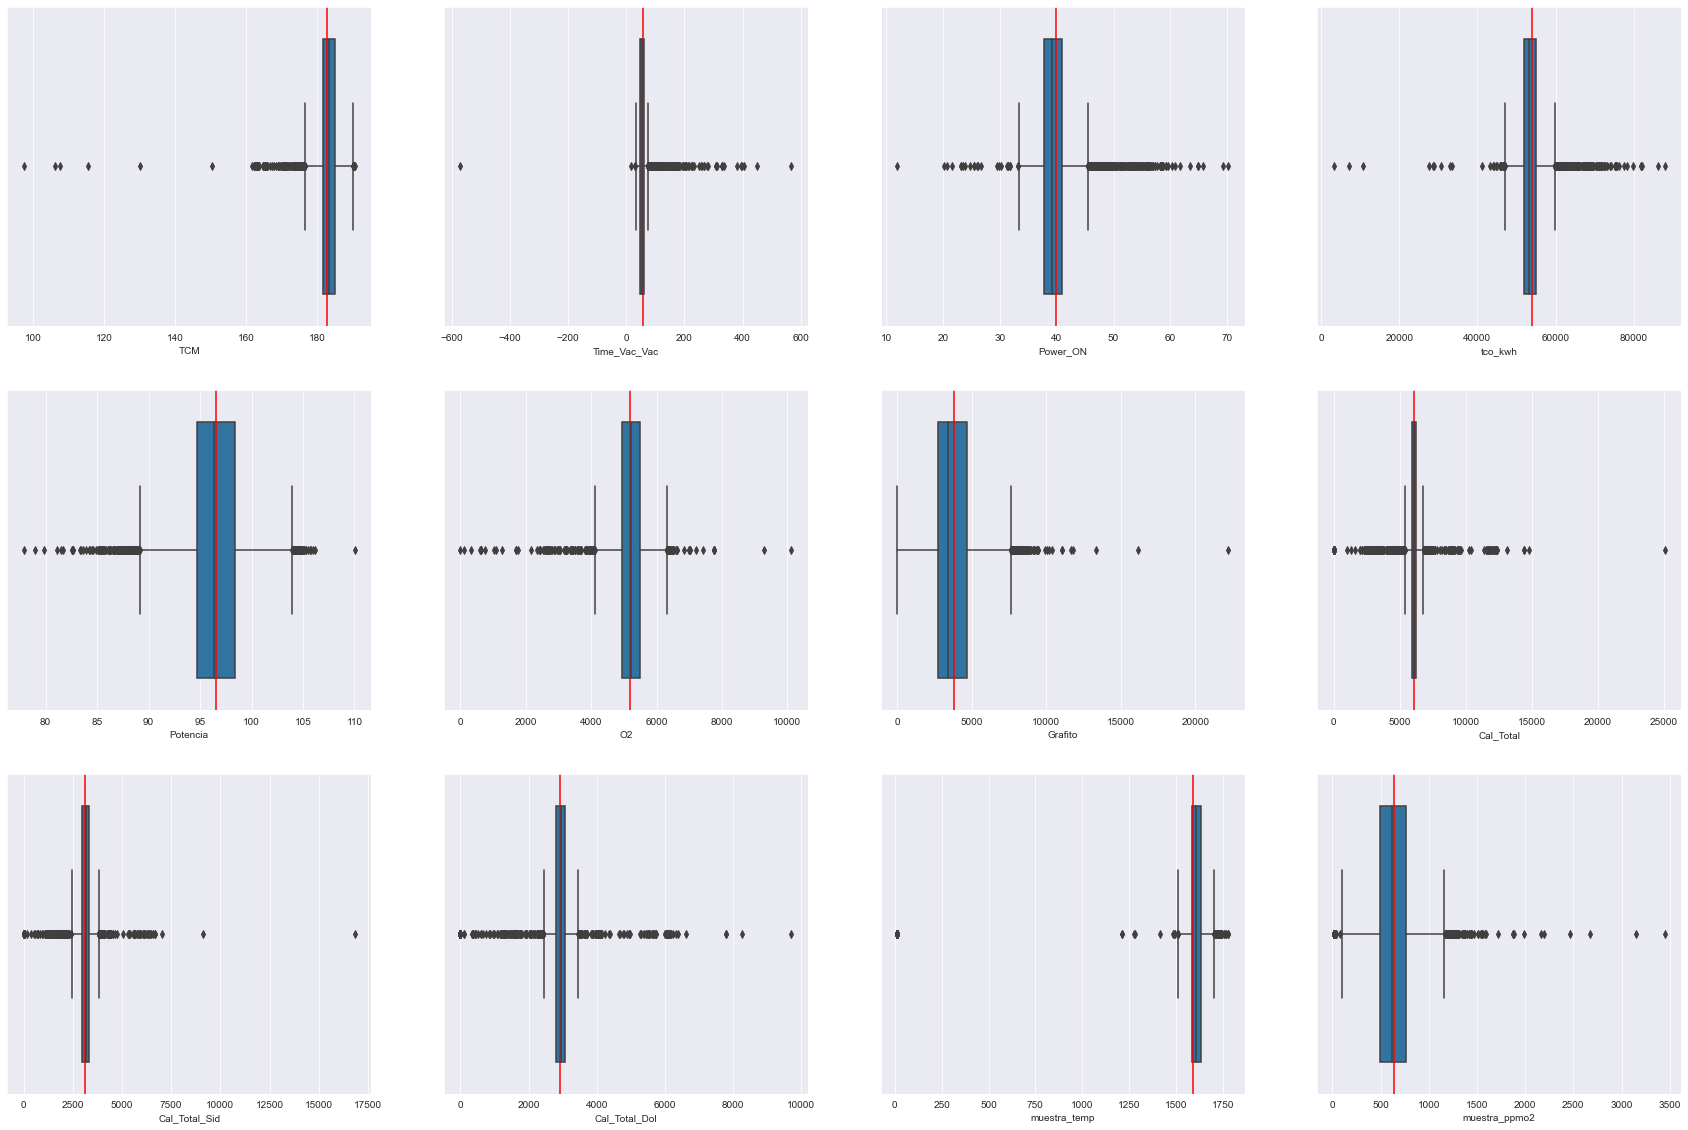

In [17]:
plt.figure(figsize=(30,20))

plt.subplot(3,4,1)
sns.boxplot(x=df['TCM']);
plt.axvline(df['TCM'].mean(), c = 'r');

plt.subplot(3,4,2)
sns.boxplot(x=df['Time_Vac_Vac']);
plt.axvline(df['Time_Vac_Vac'].mean(), c = 'r');

plt.subplot(3,4,3)
sns.boxplot(x=df['Power_ON']);
plt.axvline(df['Power_ON'].mean(), c = 'r');

plt.subplot(3,4,4)
sns.boxplot(x=df['tco_kwh']);
plt.axvline(df['tco_kwh'].mean(), c = 'r');

plt.subplot(3,4,5)
sns.boxplot(x=df['Potencia']);
plt.axvline(df['Potencia'].mean(), c = 'r');

plt.subplot(3,4,6)
sns.boxplot(x=df['O2']);
plt.axvline(df['O2'].mean(), c = 'r');

plt.subplot(3,4,7)
sns.boxplot(x=df['Grafito']);
plt.axvline(df['Grafito'].mean(), c = 'r');

plt.subplot(3,4,8)
sns.boxplot(x=df['Cal_Total']);
plt.axvline(df['Cal_Total'].mean(), c = 'r');

plt.subplot(3,4,9)
sns.boxplot(x=df['Cal_Total_Sid']);
plt.axvline(df['Cal_Total_Sid'].mean(), c = 'r');

plt.subplot(3,4,10)
sns.boxplot(x=df['Cal_Total_Dol']);
plt.axvline(df['Cal_Total_Dol'].mean(), c = 'r');

plt.subplot(3,4,11)
sns.boxplot(x=df['muestra_temp']);
plt.axvline(df['muestra_temp'].mean(), c = 'r');

plt.subplot(3,4,12)
sns.boxplot(x=df['muestra_ppmo2']);
plt.axvline(df['muestra_ppmo2'].mean(), c = 'r');

Estos boxplots nos ayudan a entender dónde está la mediana y la media (marcada con la línea vertical roja) de cada variable. En general, podemos apreciar que hay mucha variabilidad en los datos y que hay muchos valores atípicos, ya que hay varios puntos que se encuentran fuera de la marca de 1.5\*IQR, donde IQR es el rango intercuartílico.

Ahora nos concentraremos en las **variables resultantes del análisis químico de la escoria**, que representan las cantidades de los compuestos químicos de interés para analizar la basicidad.

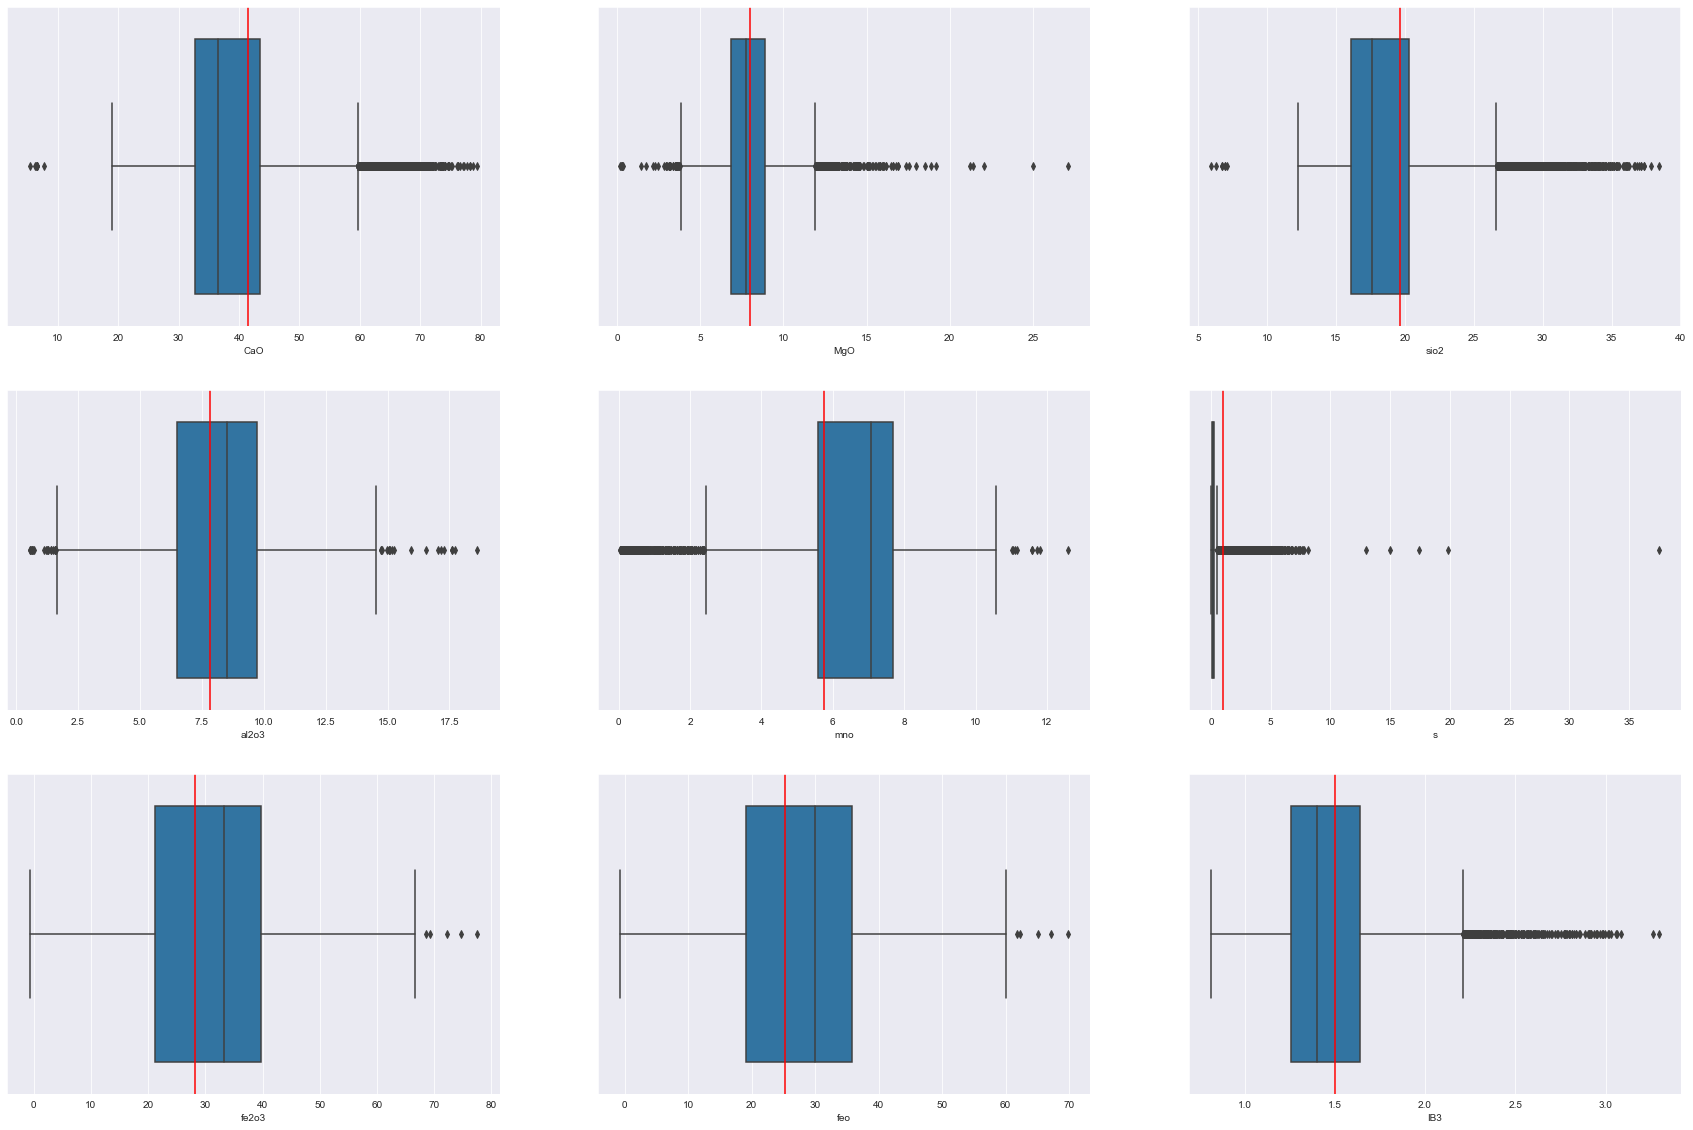

In [118]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
sns.boxplot(x=df['CaO']);
plt.axvline(df['CaO'].mean(), c = 'r');

plt.subplot(3,3,2)
sns.boxplot(x=df['MgO']);
plt.axvline(df['MgO'].mean(), c = 'r');

plt.subplot(3,3,3)
sns.boxplot(x=df['sio2']);
plt.axvline(df['sio2'].mean(), c = 'r');

plt.subplot(3,3,4)
sns.boxplot(x=df['al2o3']);
plt.axvline(df['al2o3'].mean(), c = 'r');

plt.subplot(3,3,5)
sns.boxplot(x=df['mno']);
plt.axvline(df['mno'].mean(), c = 'r');

plt.subplot(3,3,6)
sns.boxplot(x=df['s']);
plt.axvline(df['s'].mean(), c = 'r');

plt.subplot(3,3,7)
sns.boxplot(x=df['fe2o3']);
plt.axvline(df['fe2o3'].mean(), c = 'r');

plt.subplot(3,3,8)
sns.boxplot(x=df['feo']);
plt.axvline(df['feo'].mean(), c = 'r');

plt.subplot(3,3,9)
sns.boxplot(x=df['IB3']);
plt.axvline(df['IB3'].mean(), c = 'r');

Ahora vemos los histogramas correspondientes:

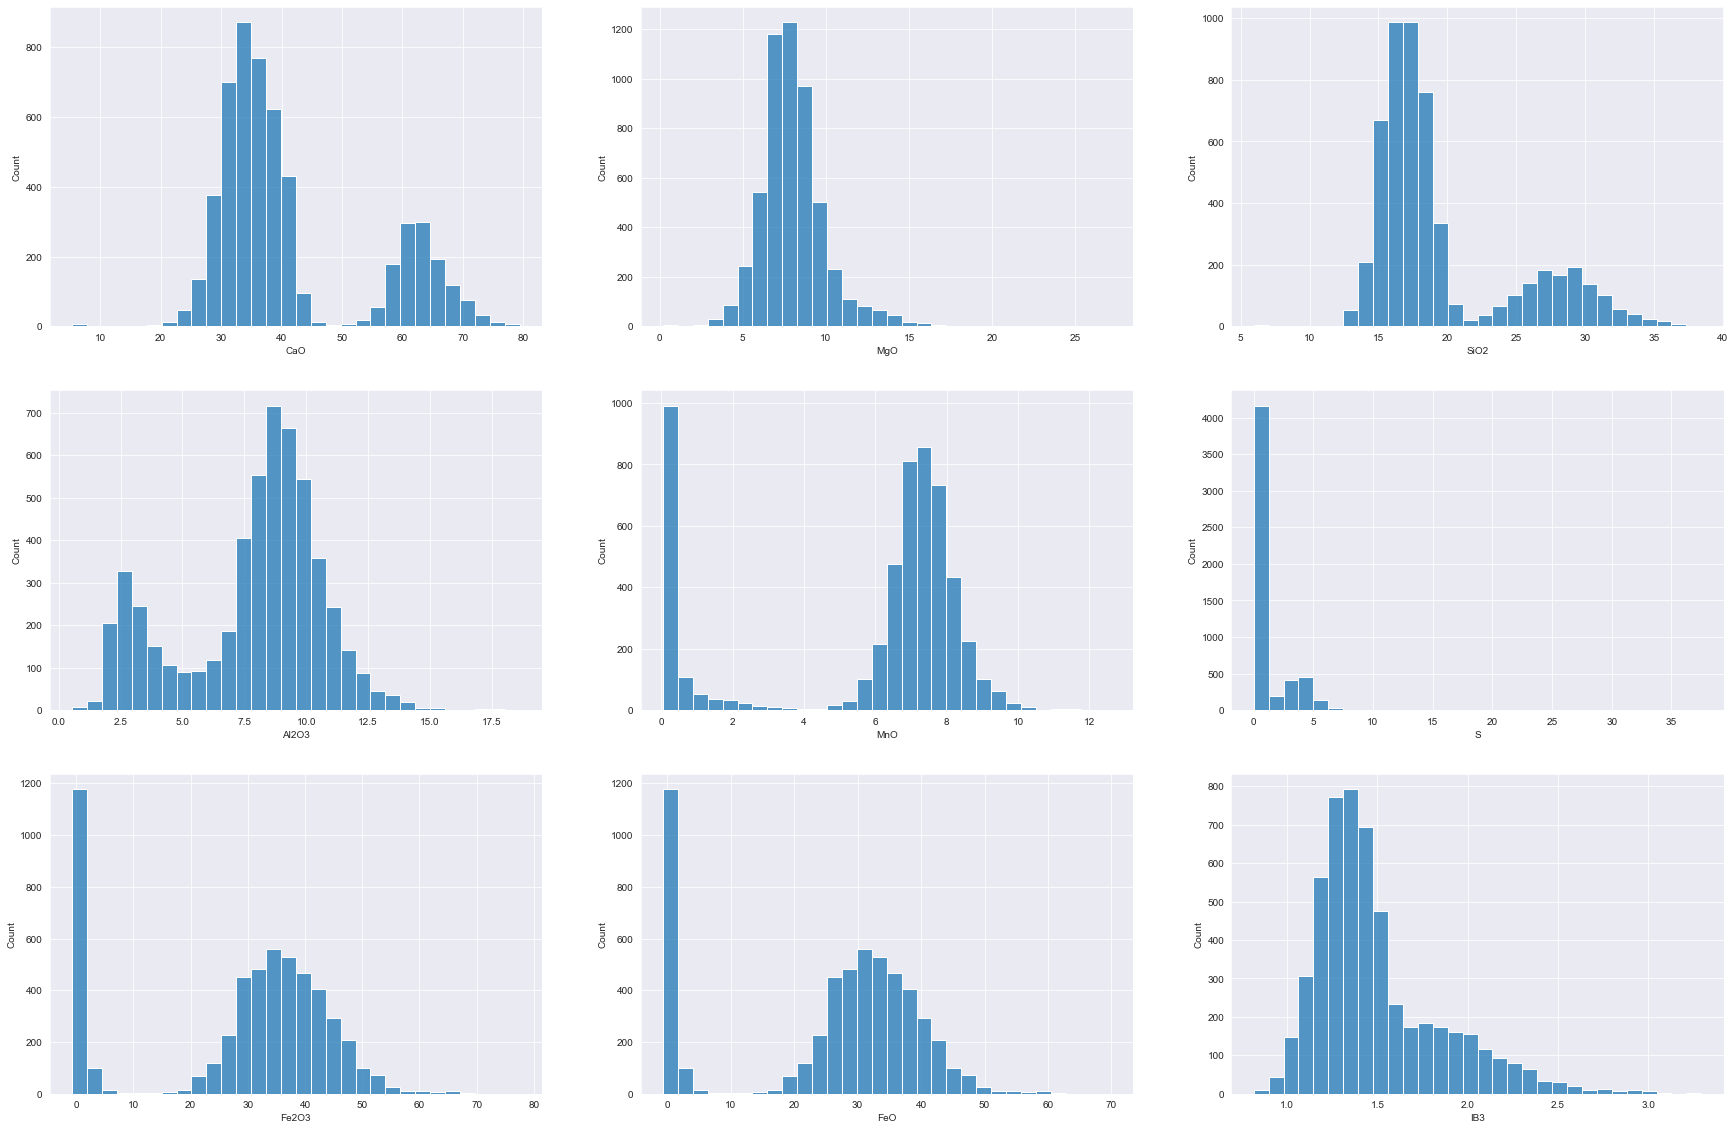

In [49]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
axe = sns.histplot(df['CaO'], bins = 30)
axe.set_xlabel('CaO');

plt.subplot(3,3,2)
axe = sns.histplot(df['MgO'], bins = 30)
axe.set_xlabel('MgO');

plt.subplot(3,3,3)
axe = sns.histplot(df['sio2'], bins = 30)
axe.set_xlabel('SiO2');

plt.subplot(3,3,4)
axe = sns.histplot(df['al2o3'], bins = 30)
axe.set_xlabel('Al2O3');

plt.subplot(3,3,5)
axe = sns.histplot(df['mno'], bins = 30)
axe.set_xlabel('MnO');

plt.subplot(3,3,6)
axe = sns.histplot(df['s'], bins = 30)
axe.set_xlabel('S');

plt.subplot(3,3,7)
axe = sns.histplot(df['fe2o3'], bins = 30)
axe.set_xlabel('Fe2O3');

plt.subplot(3,3,8)
axe = sns.histplot(df['feo'], bins = 30)
axe.set_xlabel('FeO');

plt.subplot(3,3,9)
axe = sns.histplot(df['IB3'], bins = 30)
axe.set_xlabel('IB3');

Notamos que la mayoría de las variables tienen una distribución bimodal, es decir, hay dos regiones donde se concentran los datos. Esto no se apreciaba en los boxplots, por eso es importante complementar al análisis con los histogramas y con la estadística descriptiva. Damos a continuación la estadística descriptiva básica de estas variables:

In [47]:
df[["CaO","MgO","sio2","al2o3","mno","s","fe2o3","feo","IB3"]].describe()

,CaO,MgO,sio2,al2o3,mno,s,fe2o3,feo,IB3
count,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000
mean,41.542139,7.997194,19.648034,7.839413,5.744824,0.980944,28.131705,25.343878,1.497955
std,13.043267,1.983953,5.300193,2.880700,3.053075,1.730592,16.742673,15.083488,0.358317
min,5.310000,0.200600,5.947200,0.542800,0.047200,0.011800,-0.731600,-0.659148,0.814879
25%,32.627000,6.844000,16.107000,6.490000,5.590250,0.118000,21.151500,19.055436,1.259514
50%,36.568200,7.776200,17.641000,8.525500,7.056400,0.153400,33.252400,29.957132,1.399668
75%,43.438750,8.868290,20.322550,9.723200,7.693600,0.259600,39.754200,35.814534,1.639863
max,79.436420,27.104600,38.429060,18.620400,12.590600,37.506536,77.526000,69.843256,3.294944


In [48]:
df[["CaO","MgO","sio2","al2o3","mno","s","fe2o3","feo","IB3"]].median()

CaO      36.568200
MgO       7.776200
sio2     17.641000
al2o3     8.525500
mno       7.056400
s         0.153400
fe2o3    33.252400
feo      29.957132
IB3       1.399668
dtype: float64

Notamos varias cosas:

- La media no es un indicador de valores típicos, en general, para estas variables, ya que al estar distribuidas de manera bimodal, puede ocurrir que la media indique valores en donde hay poca concentración de datos. Esto se ve claramente en el caso de **MnO**, que tiene media de 5.74, y en el histograma se puede apreciar que alrededor de esa región casi no hay datos.
- La única variable que no presenta una distribución bimodal es **MgO**.
- Hay variables que tienen uno de los dos picos mucho más grande que el otro.
- No es claro si la variable IB3 se distribuye de manera bimodal.
- Hay valores mínimos de **FeO** y **Fe2O3** negativos. Esto no es físicamente posible, y por lo tanto, se deben eliminar los registros correspondientes.

En general, vemos entonces que hay una, o unas variables, que están segmentando a los resultados del análisis químico en dos categorías. Una recomendación sería estudiar este fenómeno más a fondo y ver si es posible dilucidar cuál es el factor que está causando esto.  

Comencemos eliminando los registros que tengan **FeO** negativo.

In [50]:
df = df[df["feo"]>=0]
df.shape

(5376, 40)

Esto nos quitó 8 filas. Calculamos de nuevo la estadística descriptiva para las variables ya sin estos registros:

In [51]:
df[["CaO","MgO","sio2","al2o3","mno","s","fe2o3","feo","IB3"]].describe()

,CaO,MgO,sio2,al2o3,mno,s,fe2o3,feo,IB3
count,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000
mean,41.581690,8.007684,19.663565,7.849549,5.753201,0.981660,28.174472,25.382407,1.498587
std,12.983384,1.965480,5.282384,2.870534,3.047604,1.731063,16.718347,15.061573,0.357667
min,18.974400,1.451400,12.248400,1.139880,0.047200,0.059000,0.127440,0.114814,0.814879
25%,32.635850,6.844000,16.118800,6.501800,5.628600,0.118000,21.343250,19.228159,1.260469
50%,36.574100,7.776200,17.641000,8.531400,7.056400,0.153400,33.264200,29.967752,1.399775
75%,43.450550,8.873600,20.333465,9.723200,7.705400,0.262550,39.766000,35.825272,1.640238
max,79.436420,27.104600,38.429060,18.620400,12.590600,37.506536,77.526000,69.843256,3.294944


De la forma de los boxplots parecería haber varios datos atípicos en la mayoría de las variables. Sin embargo, al ver los histogramas se puede apreciar la bimodalidad en la mayoría de las distribuciones. De aquí podemos suponer que eliminar los datos atípicos basándonos en los boxplots nos puede dar problemas, porque estaríamos perdiendo información esencial contenida en las regiones de mayor densidad de datos. Aquí están los boxplots e histogramas de **FeO** y de **IB3** ya sin los registros con valores negativos:

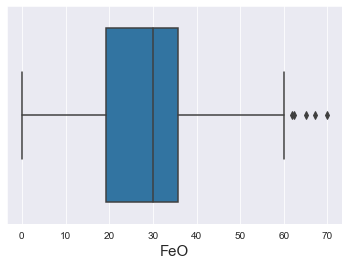

In [53]:
a = sns.boxplot(x=df["feo"])
a.set_xlabel("FeO", fontsize = 15);

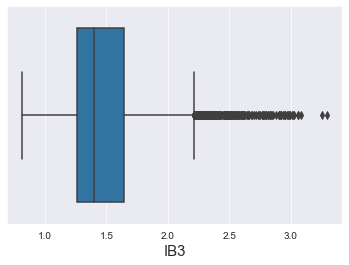

In [54]:
b = sns.boxplot(x=df["IB3"])
b.set_xlabel("IB3", fontsize = 15);

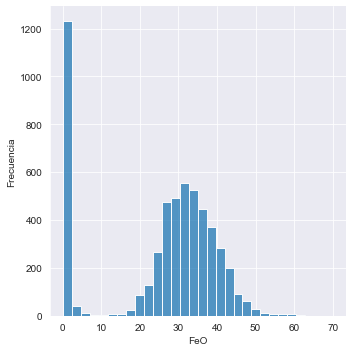

In [76]:
h_feo = sns.displot(df["feo"], kde = False, bins = 30)
h_feo.set_axis_labels("FeO", "Frecuencia");

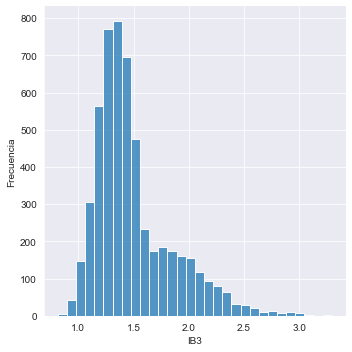

In [77]:
h_ib3 = sns.displot(df["IB3"], kde = False, bins = 30)
h_ib3.set_axis_labels("IB3", "Frecuencia");

Como es difícil tener medidas descriptivas adecuadas, analizamos la proporción de óxidos básicos respecto al total de básicos más ácidos. De esta manera, se tendrá otra medida, complementaria al **IB3** que permita tener una idea de la basicidad de la escoria. La proporción estará dada por prop = (MgO + CaO)/(MgO + CaO + SiO2 + Al2O3 + FeO + MnO). Añadimos entonces la columna **prop** a nuestro dataset:

In [56]:
df["prop"] = (df["MgO"]+df["CaO"])/(df["MgO"]+df["CaO"]+df["sio2"]+df["al2o3"]+df["feo"]+df["mno"])

C:\Users\Daniel\AppData\Local\Temp\ipykernel_8444\506164513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prop"] = (df["MgO"]+df["CaO"])/(df["MgO"]+df["CaO"]+df["sio2"]+df["al2o3"]+df["feo"]+df["mno"])


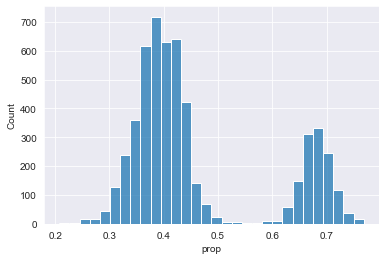

In [58]:
prop = sns.histplot(df['prop'], bins = 30)
prop.set_xlabel('prop');

Vemos entonces de manera muy clara que los datos se componen de dos grandes categorías: aquellos que tienen menos de la mitad de compuestos básicos, y aquellos que tienen más de la mitad. A continuación haremos un análisis de correlación con todos los datos y luego los segmentaremos en estas dos categorías.

## 3. Análisis de correlación

In [60]:
matrix_correlation = df[["CaO","MgO","sio2","al2o3","mno","s","fe2o3","feo","IB3"]].corr()
matrix_correlation

,CaO,MgO,sio2,al2o3,mno,s,fe2o3,feo,IB3
CaO,1.000000,-0.126273,0.884277,-0.746206,-0.904657,0.805583,-0.948639,-0.948639,0.891673
MgO,-0.126273,1.000000,-0.003207,0.199290,0.094071,-0.187353,-0.007212,-0.007212,-0.237668
sio2,0.884277,-0.003207,1.000000,-0.705543,-0.879557,0.767780,-0.911461,-0.911461,0.616120
al2o3,-0.746206,0.199290,-0.705543,1.000000,0.817085,-0.757303,0.656828,0.656828,-0.791951
mno,-0.904657,0.094071,-0.879557,0.817085,1.000000,-0.863076,0.864202,0.864202,-0.787433
s,0.805583,-0.187353,0.767780,-0.757303,-0.863076,1.000000,-0.796987,-0.796987,0.732663
fe2o3,-0.948639,-0.007212,-0.911461,0.656828,0.864202,-0.796987,1.000000,1.000000,-0.768223
feo,-0.948639,-0.007212,-0.911461,0.656828,0.864202,-0.796987,1.000000,1.000000,-0.768223
IB3,0.891673,-0.237668,0.616120,-0.791951,-0.787433,0.732663,-0.768223,-0.768223,1.000000


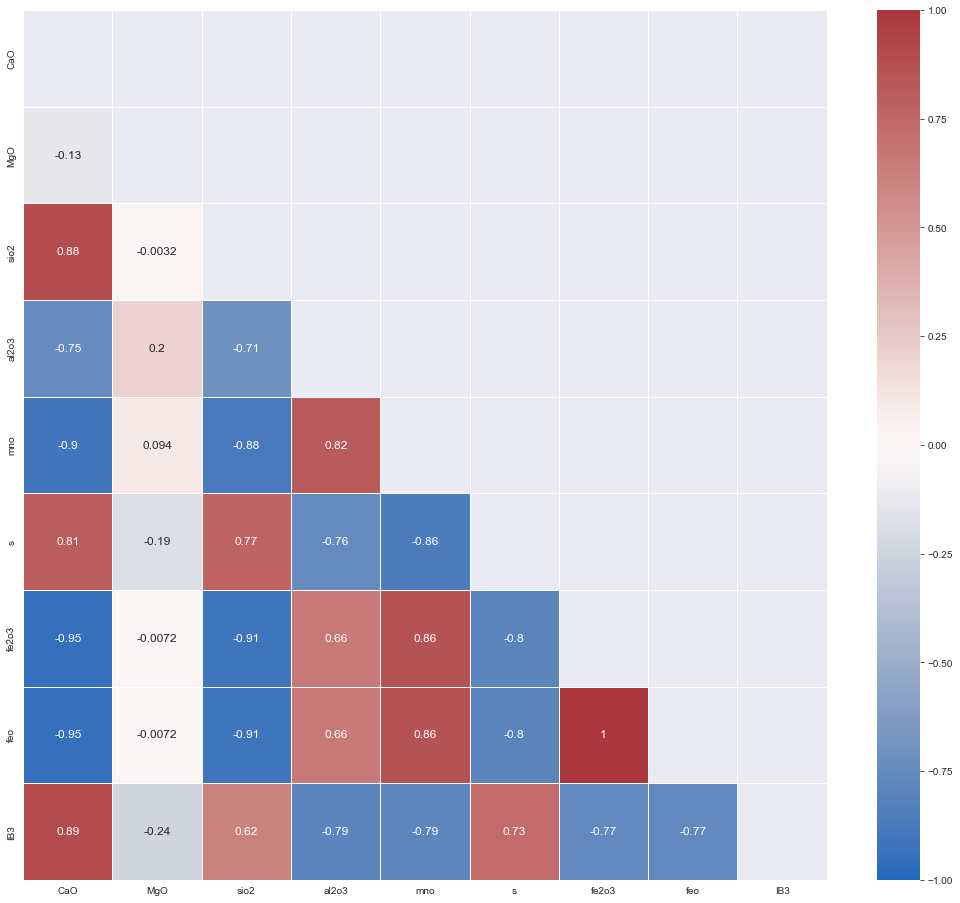

In [64]:
fig = plt.figure(figsize = (18,16))
mask = np.triu(np.ones_like(matrix_correlation, dtype=bool))
ax = sns.heatmap(matrix_correlation, mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'vlag', lw = 0.8, annot_kws = {"size": 12})

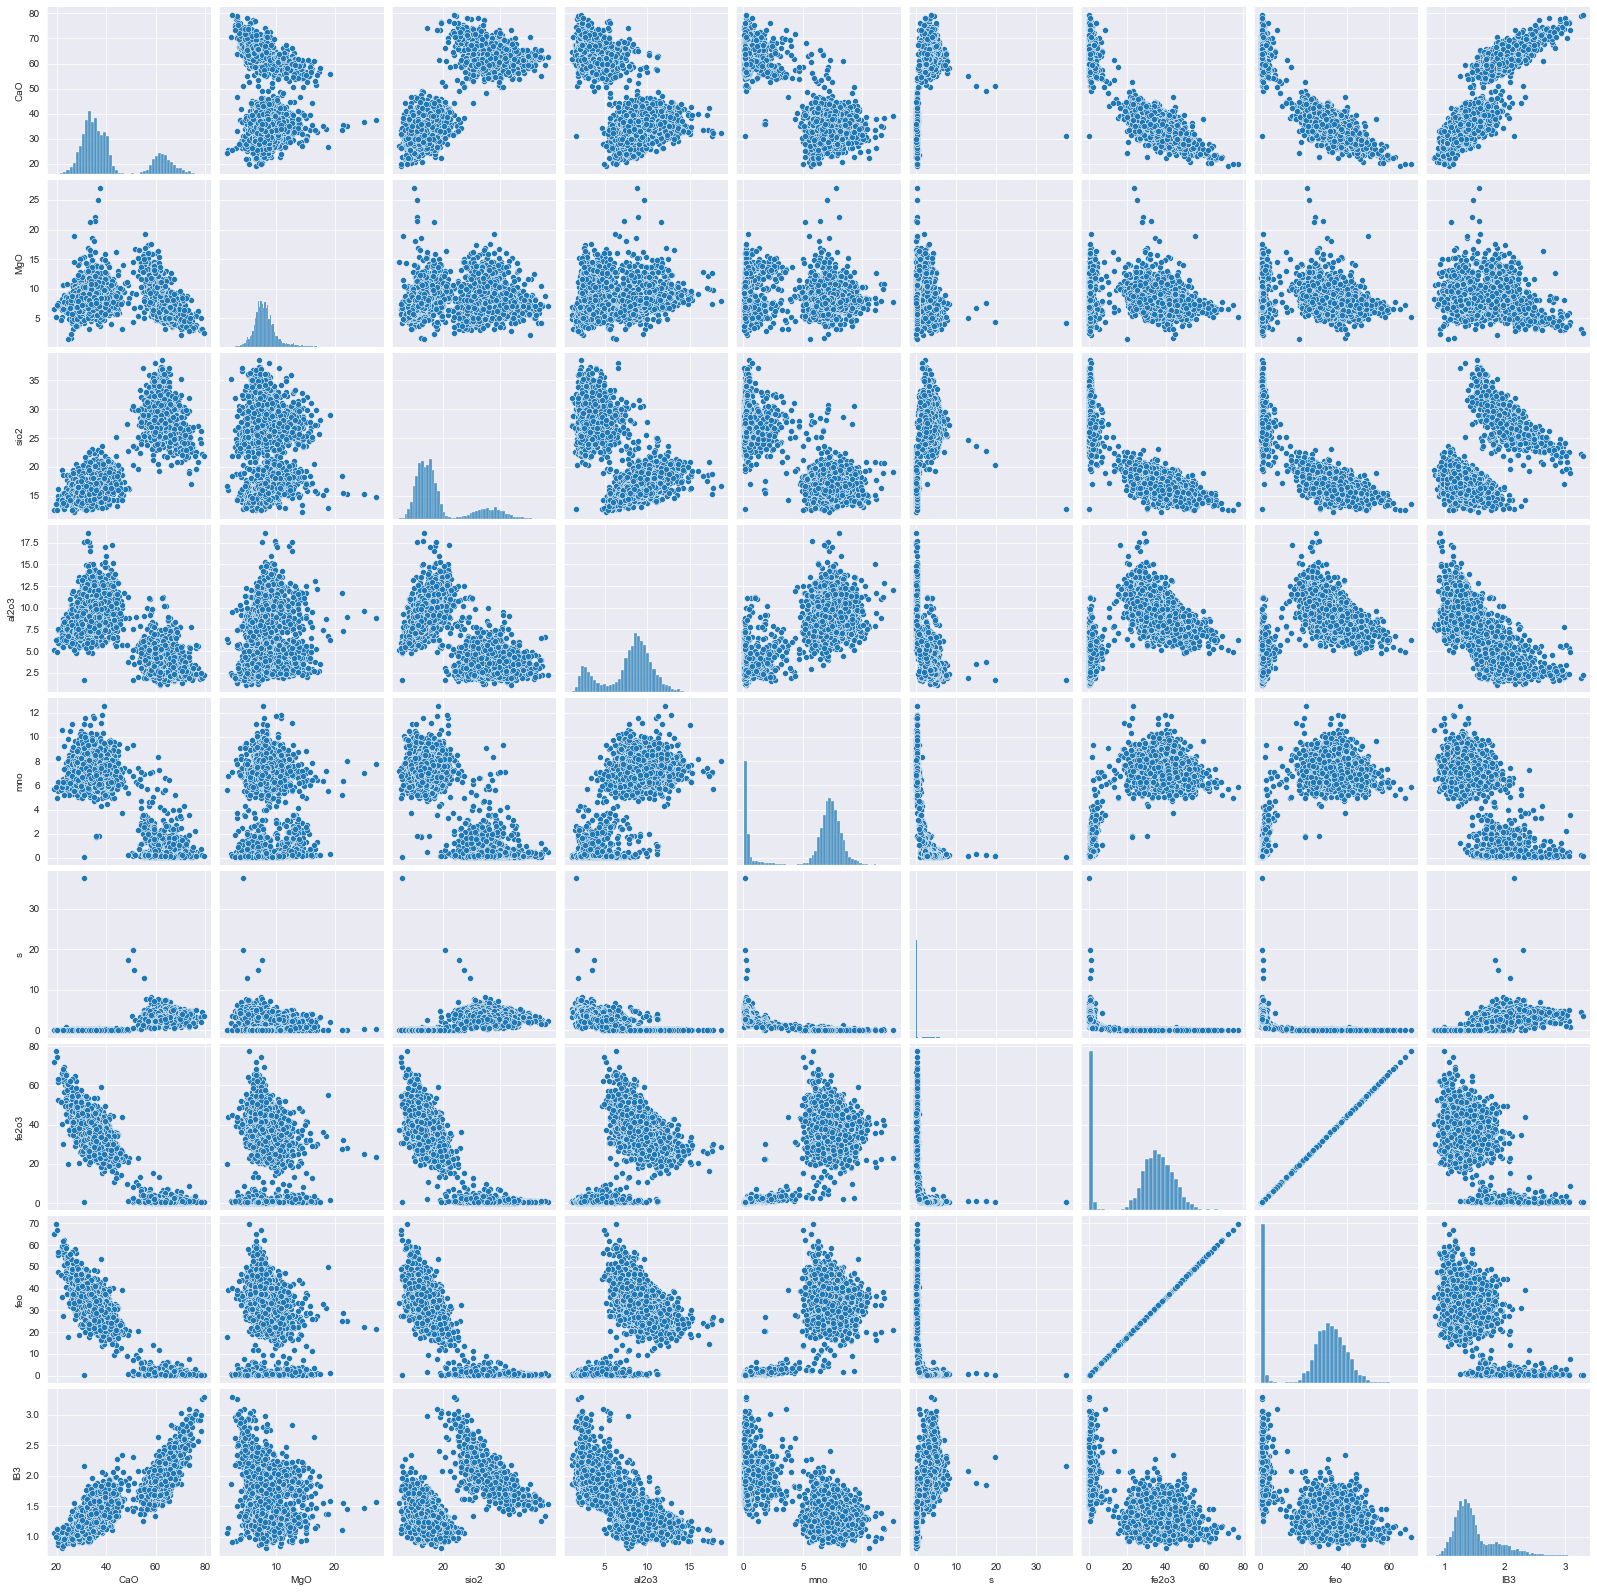

In [65]:
sns.pairplot(df[["CaO","MgO","sio2","al2o3","mno","s","fe2o3","feo","IB3"]]);

Vemos que **Fe2O3** y **FeO** tienen una correlación perfecta, y vemos que, en general, los coeficientes de correlación son altos (en valor absoluto), lo cual habla de una interrelación entre todas las variables. Asimismo, notamos que se forman dos regiones donde se agrupan los puntos, por lo que suponemos que esto tiene que ver con la proporción de compuestos básicos que hay en la muestra. Por ese motivo, analicemos qué pasa cuando segmentamos los datos por **prop < 0.5** y **prop > 0.5**.

Consideremos los datos con menos de la mitad de basicidad:

In [69]:
matrix_correlation2 = df[df["prop"]<0.5][["CaO","MgO","sio2","al2o3","mno","feo","IB3"]].corr()
matrix_correlation2

,CaO,MgO,sio2,al2o3,mno,feo,IB3
CaO,1.000000,0.034041,0.443829,0.355645,-0.039648,-0.737748,0.625341
MgO,0.034041,1.000000,0.280818,0.291513,0.045529,-0.243599,-0.232310
sio2,0.443829,0.280818,1.000000,0.593067,0.065433,-0.631590,-0.327203
al2o3,0.355645,0.291513,0.593067,1.000000,0.066021,-0.592039,-0.400023
mno,-0.039648,0.045529,0.065433,0.066021,1.000000,-0.135211,-0.102059
feo,-0.737748,-0.243599,-0.631590,-0.592039,-0.135211,1.000000,-0.164515
IB3,0.625341,-0.232310,-0.327203,-0.400023,-0.102059,-0.164515,1.000000


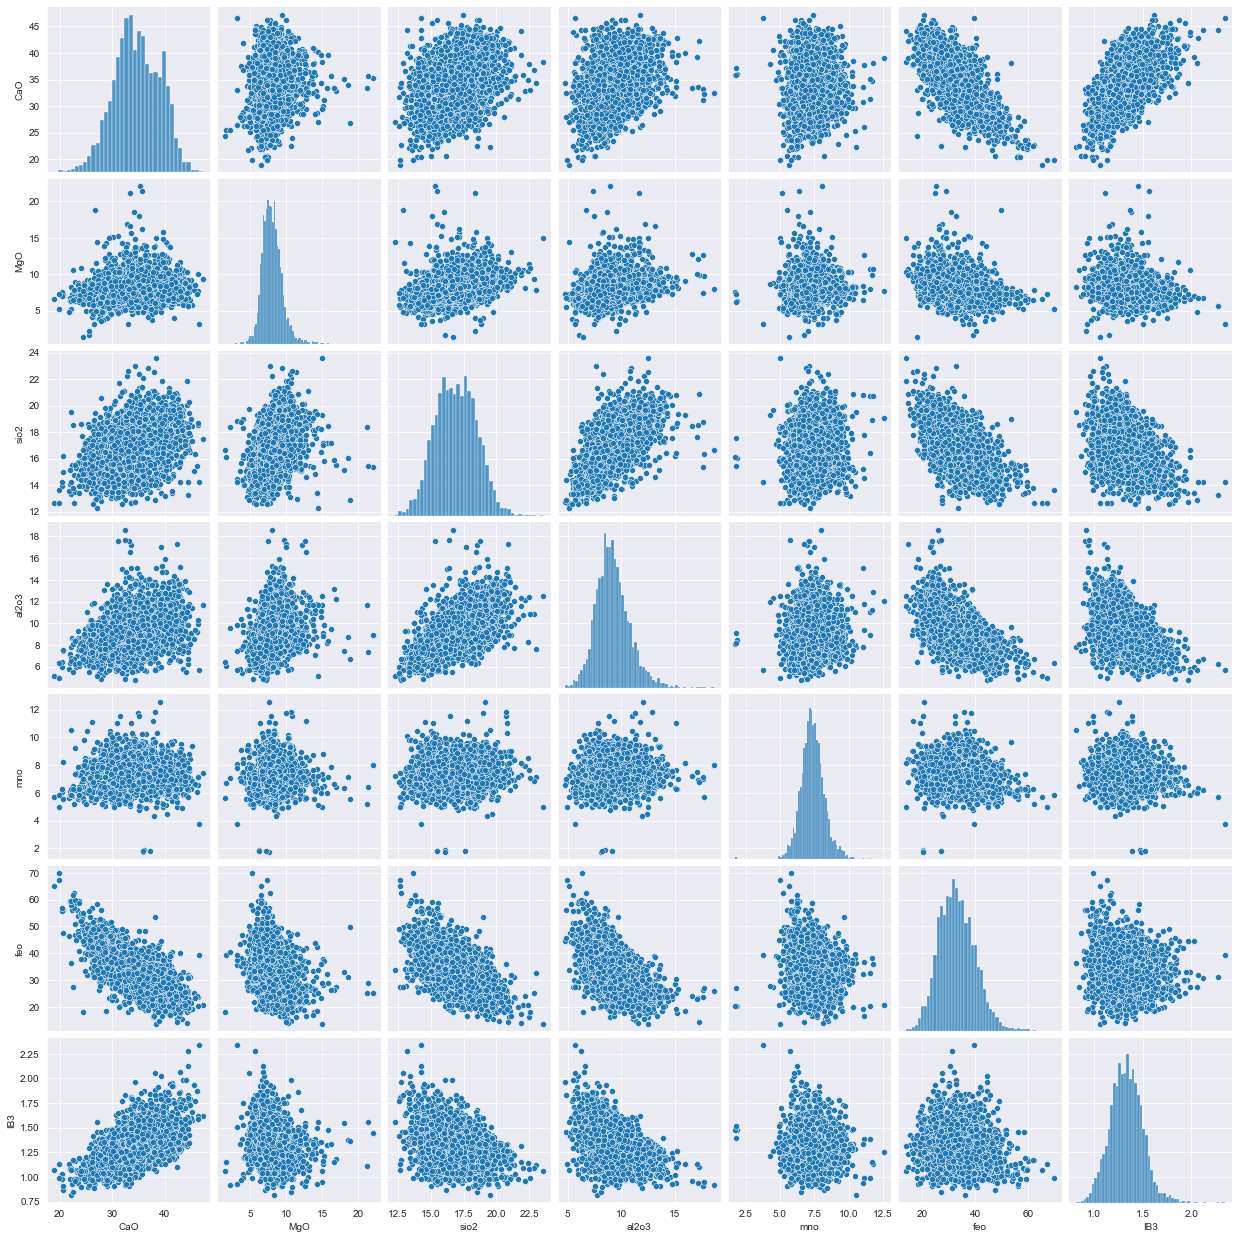

In [71]:
sns.pairplot(df[df["prop"]<0.5][["CaO","MgO","sio2","al2o3","mno","feo","IB3"]]);

¡Vemos que esto elimina uno de los dos clusters!  
Ahora analicemos los datos que tienen más de la mitad de basicidad.

In [73]:
matrix_correlation3 = df[df["prop"]>0.5][["CaO","MgO","sio2","al2o3","mno","feo","IB3"]].corr()
matrix_correlation3

,CaO,MgO,sio2,al2o3,mno,feo,IB3
CaO,1.000000,-0.622487,-0.142875,-0.281614,-0.336548,-0.372502,0.741773
MgO,-0.622487,1.000000,-0.028519,0.311189,0.266641,0.247187,-0.426117
sio2,-0.142875,-0.028519,1.000000,-0.197307,-0.260256,-0.410479,-0.686632
al2o3,-0.281614,0.311189,-0.197307,1.000000,0.358635,0.401771,-0.343848
mno,-0.336548,0.266641,-0.260256,0.358635,1.000000,0.762794,-0.125971
feo,-0.372502,0.247187,-0.410479,0.401771,0.762794,1.000000,-0.058032
IB3,0.741773,-0.426117,-0.686632,-0.343848,-0.125971,-0.058032,1.000000


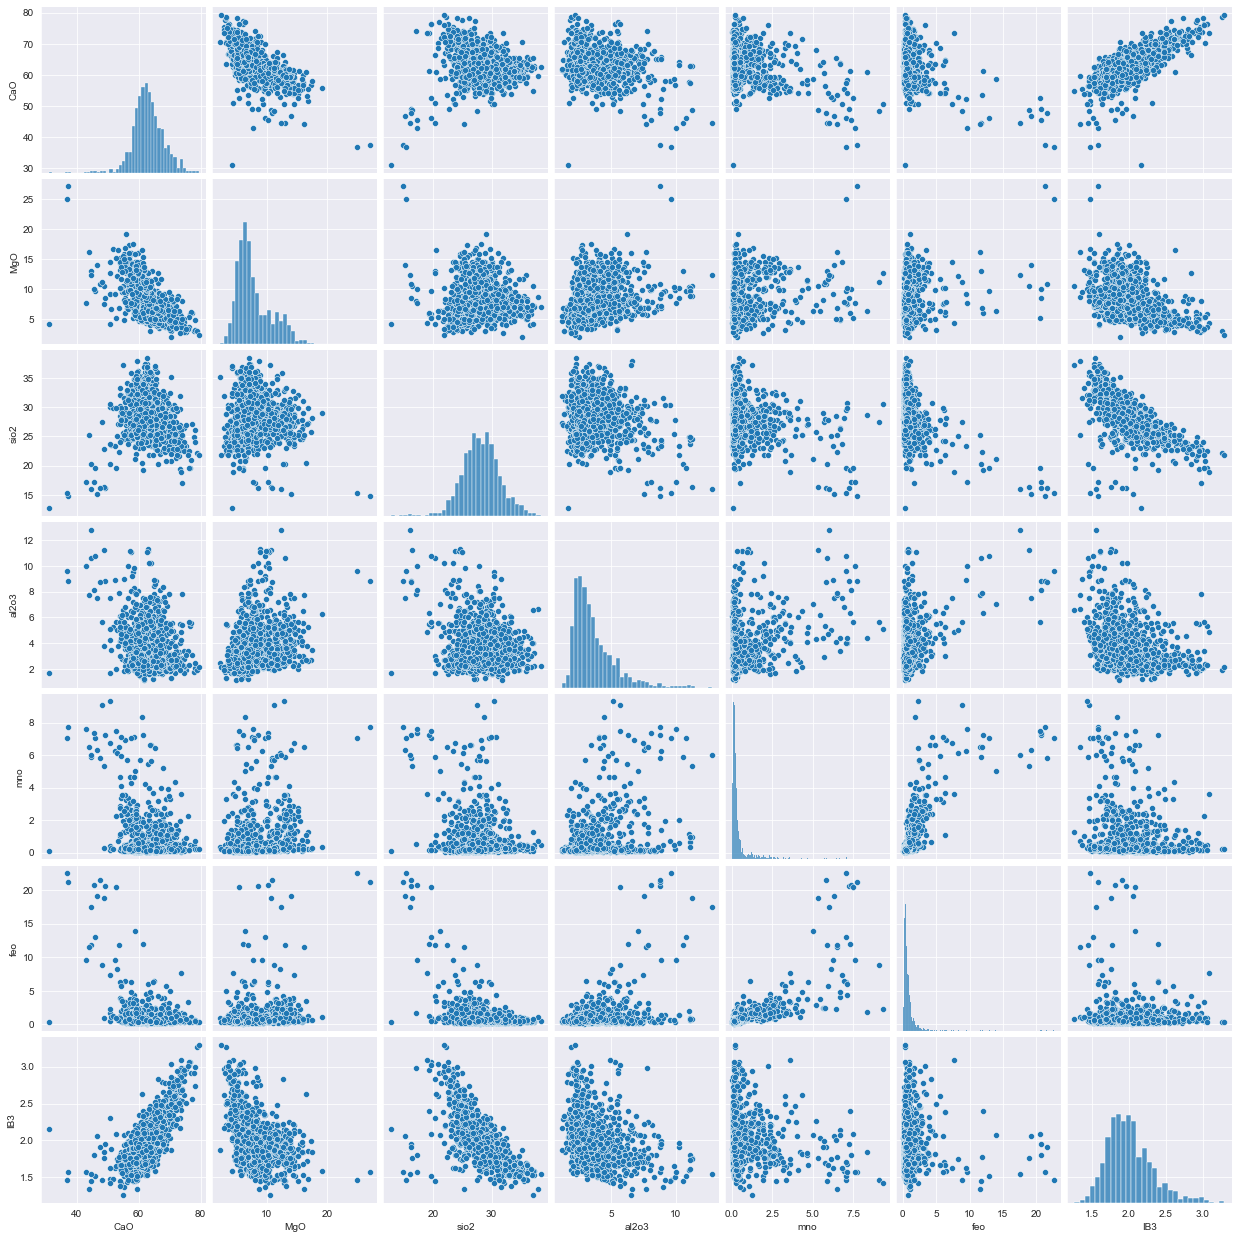

In [74]:
sns.pairplot(df[df["prop"]>0.5][["CaO","MgO","sio2","al2o3","mno","feo","IB3"]]);

Definimos la columna **Básico** que tendrá un 1 si la proporción de compuestos básicos es mayor a 0.5, y tendrá el valor de 0 si la proporción de compuestos básicos es menor a 0.5.

In [79]:
df["Básico"] = np.where(df["prop"]>0.5, 1, 0)

Contamos 

In [84]:
(df["Básico"].sum()/df.shape[0])*100

24.311755952380953

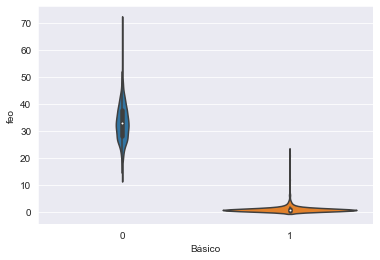

In [82]:
sns.violinplot(y=df['feo'], x=df['Básico']);

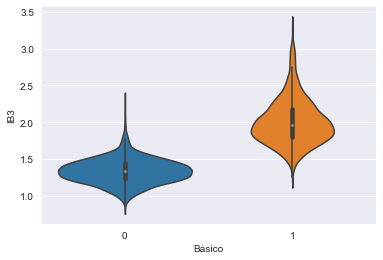

In [83]:
sns.violinplot(y=df['IB3'], x=df['Básico']);

In [30]:
feo_esperado = (df["feo"]>16) & (df["feo"]<20)
ib3_esperado = (df["IB3"]>1.1) & (df["IB3"]<1.8)

In [37]:
df[feo_esperado].shape[0]

64

In [41]:
(df[feo_esperado].shape[0]/df.shape[0])*100

1.188707280832095

In [38]:
df[ib3_esperado].shape[0]

4059

In [42]:
(df[ib3_esperado].shape[0]/df.shape[0])*100

75.39004457652302

In [39]:
df[feo_esperado & ib3_esperado].shape[0]

56